In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/currency.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import seaborn as sns
from tensorflow import keras

import matplotlib.pyplot as plt
import os
%matplotlib inline
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import layers, models
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
import cv2
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.utils import plot_model
import matplotlib.pyplot as plt
import cv2

from IPython.display import SVG, Image
import tensorflow as tf
from keras.optimizers import Adam
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.14.0


In [ ]:
# Define the data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
    )


In [ ]:
def imgAugmentation(input_directory, output_directory):

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    # Generate augmented images and save them to the output directory
    image_filenames = os.listdir(input_directory)
    for filename in image_filenames:
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(input_directory, filename)
            save_prefix = os.path.splitext(filename)[0]
            save_count = 0

            # Load the image
            img = tf.keras.preprocessing.image.load_img(image_path)

            # Convert the image to a numpy array
            x = tf.keras.preprocessing.image.img_to_array(img)

            # Expand the dimensions of the image to match the batch size
            x = x.reshape((1,) + x.shape)

            # Generate augmented images
            for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory, save_prefix=save_prefix, save_format='jpeg'):
                save_count += 1
                if save_count >= 10:  # Generate 10 augmented images per original image
                    break

In [ ]:

# Set the input and output directories
input_directory1 = '/content/currency/currency/fiftyRiyal'
output_directory1 = '/content/currency/currency/fiftyRiyal'
imgAugmentation(input_directory1,output_directory1 )

In [ ]:

# Set the input and output directories
input_directory2 = '/content/currency/currency/fiveRiyal'
output_directory2 = '/content/currency/currency/fiveRiyal'
imgAugmentation(input_directory2,output_directory2 )

In [ ]:
# Set the input and output directories
input_directory3 = '/content/currency/currency/fivehandred'
output_directory3 = '/content/currency/currency/fivehandred'
imgAugmentation(input_directory3,output_directory3 )

In [ ]:
# Set the input and output directories
input_directory4 = '/content/currency/currency/oneHnandred'
output_directory4 = '/content/currency/currency/oneHnandred'
imgAugmentation(input_directory4,output_directory4 )

In [ ]:
# Set the input and output directories
input_directory5 = '/content/currency/currency/oneRiyal'
output_directory5 = '/content/currency/currency/oneRiyal'
imgAugmentation(input_directory5,output_directory5)

In [ ]:
# Set the input and output directories
input_directory6 = '/content/currency/currency/tenRiyal'
output_directory6 = '/content/currency/currency/tenRiyal'
imgAugmentation(input_directory6,output_directory6)

In [ ]:
# Set the input and output directories
input_directory7 = '/content/currency/currency/twentyRiyal'
output_directory7 = '/content/currency/currency/twentyRiyal'
imgAugmentation(input_directory7,output_directory7)

In [ ]:
# Set the input and output directories
input_directory8 = '/content/currency/currency/twoHandred'
output_directory8 = '/content/currency/currency/twoHandred'
imgAugmentation(input_directory8,output_directory8)

In [ ]:
'''
# Read the image
imageT = cv2.imread('/content/currency/currency/fivehandred/Five hundred riyal(3)_0_4246.jpeg')
cv2_imshow(imageT)
'''

"\n# Read the image\nimageT = cv2.imread('/content/currency/currency/fivehandred/Five hundred riyal(3)_0_4246.jpeg')\ncv2_imshow(imageT)\n"

In [ ]:
batch_size = 32

train_data_gen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # 80% for training, 20% for validation
    preprocessing_function=preprocess_input

)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    '/content/currency/currency',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_data_gen.flow_from_directory(
    '/content/currency/currency',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)


Found 680 images belonging to 8 classes.
Found 166 images belonging to 8 classes.


In [ ]:

# Load the VGG16 model (excluding the top layer)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
#Create a new model and add the VGG16 base model to it
model = Sequential()
model.add(vgg)

In [ ]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 21139528 (80.64 MB)
Trainable params: 6424840 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15
)

<ipython-input-20-c10eeb214239>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/15
21/21 [==============================] - 476s 22s/step - loss: 2.9602 - accuracy: 0.3981 - val_loss: 1.5763 - val_accuracy: 0.4437
Epoch 2/15
21/21 [==============================] - 519s 25s/step - loss: 0.8646 - accuracy: 0.7485 - val_loss: 0.9692 - val_accuracy: 0.6500
Epoch 3/15
21/21 [==============================] - 523s 25s/step - loss: 0.4438 - accuracy: 0.8642 - val_loss: 0.7407 - val_accuracy: 0.7375
Epoch 4/15
21/21 [==============================] - 523s 25s/step - loss: 0.3578 - accuracy: 0.8873 - val_loss: 0.7283 - val_accuracy: 0.7500
Epoch 5/15
21/21 [==============================] - 519s 25s/step - loss: 0.2634 - accuracy: 0.9228 - val_loss: 0.6550 - val_accuracy: 0.7750
Epoch 6/15
21/21 [==============================] - 469s 22s/step - loss: 0.1933 - accuracy: 0.9460 - val_loss: 0.5020 - val_accuracy: 0.8313
Epoch 7/15
21/21 [==============================] - 471s 23s/step - loss: 0.1367 - accuracy: 0.9630 - val_loss: 0.4716 - val_accuracy: 0.8375
Epoch 

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

6/6 [==============================] - 99s 15s/step - loss: 0.6084 - accuracy: 0.8193
Validation Loss: 0.6083893775939941, Validation Accuracy: 0.8192771077156067


In [ ]:
model.save('currency_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model
model = tf.keras.models.load_model('/content/currency_detection_model.h5')


In [ ]:
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array /= 255.0  # Normalize the image


# Reshape the image to match the model's input shape
img_array = img_array.reshape((1,) + img_array.shape)



In [ ]:

# Make predictions with the model
predictions = model.predict(img_array)


1/1 [==============================] - 0s 389ms/step


In [ ]:
# Get the predicted class (currency label)
predicted_class_index = np.argmax(predictions)


In [ ]:

# Mapping from class index to currency denomination
class_to_currency = {
    0: '50 SR',
    1: '5 SR',
    2: '500 SR',
    3: '100 SR',
    4: '1 SR',
    5: '10 SR',
    6: '20 SR',
    7: '200 SR'
}

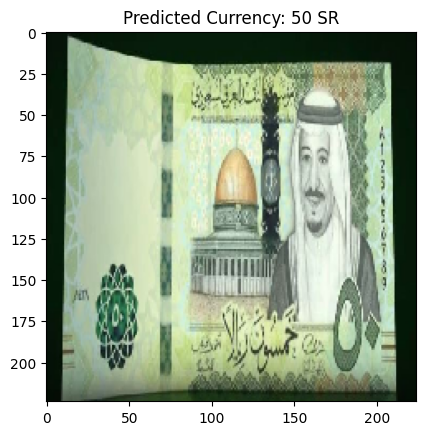

In [ ]:

# Get the predicted currency denomination
predicted_currency = class_to_currency[predicted_class_index]

# Display the image with the predicted currency denomination
plt.imshow(img)
plt.title(f'Predicted Currency: {predicted_currency}')
plt.show()

In [ ]:
# List of image paths
image_paths = ['/content/fifty.png', '/content/five.jfif', '/content/500sr.png', '/content/1-SAR.jpg','/content/20sr.png','/content/100sr.jfif']

1/1 [==============================] - 0s 489ms/step


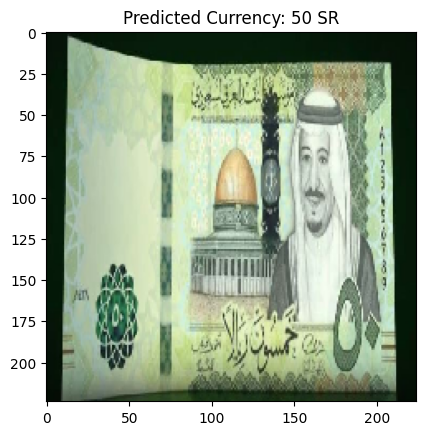

1/1 [==============================] - 1s 531ms/step


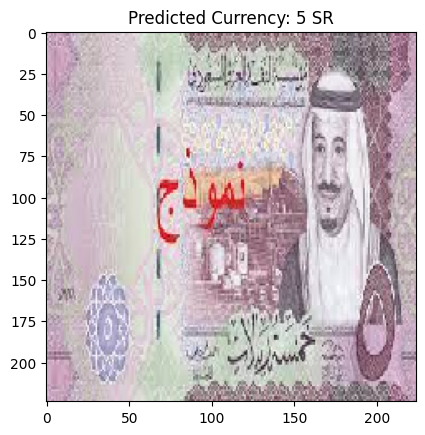

1/1 [==============================] - 1s 511ms/step


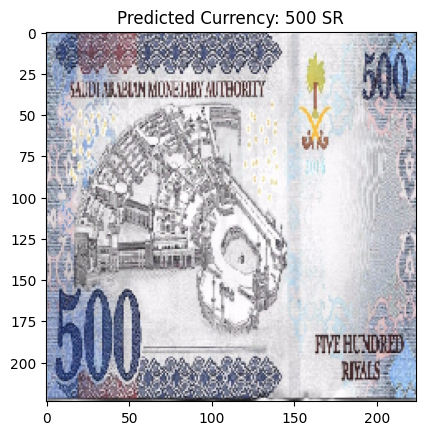

1/1 [==============================] - 1s 527ms/step


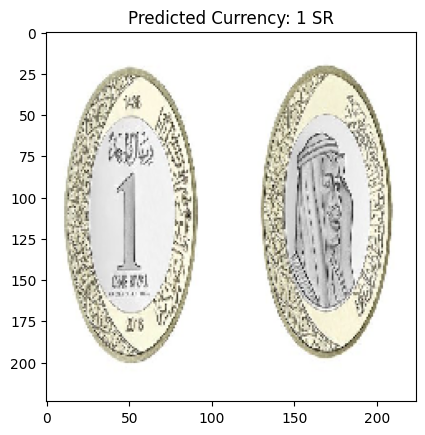

1/1 [==============================] - 1s 501ms/step


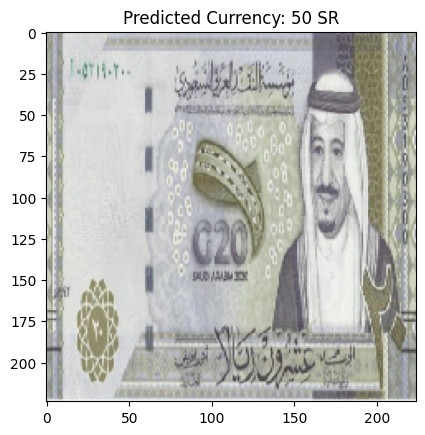

1/1 [==============================] - 0s 469ms/step


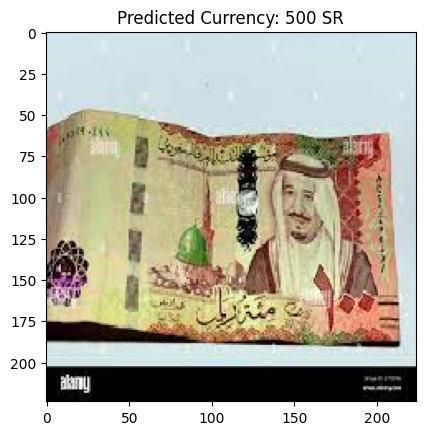

In [ ]:

# Loop through the images
for image_path in image_paths:
    # Load a new image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize the image

    # Reshape the image to match the model's input shape
    img_array = img_array.reshape((1,) + img_array.shape)

    # Make predictions with the model
    predictions = model.predict(img_array)

    # Get the predicted class (currency label)
    predicted_class_index = np.argmax(predictions)

    # Get the predicted currency denomination
    predicted_currencys = class_to_currency[predicted_class_index]

    # Display the image with the predicted currency denomination
    plt.imshow(img)
    plt.title(f'Predicted Currency: {predicted_currencys}')
    plt.show()